<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/loan_status_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
loan = pd.read_csv('loan_status.csv')

In [ ]:
loan.shape

(614, 13)

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
null = loan.isna().sum()
nullpercent = (null/loan.shape[0])*100
print(nullpercent)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [ ]:
loan = loan.dropna()

In [ ]:
null = loan.isna().sum()
nullpercent = (null/loan.shape[0])*100
print(nullpercent)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


In [ ]:
loan.duplicated().sum()

0

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
loan = loan.replace({"Married":{'Yes':1, 'No': 0}})

In [ ]:
loan = loan.replace({"Self_Employed":{'Yes':1, 'No': 0}})

In [ ]:
loan = loan.replace({"Education":{'Graduate':1, 'Not Graduate': 0}})

In [ ]:
loan = loan.replace({"Property_Area":{'Urban':1, 'Semiurban': 0, 'Rural':2}})

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [ ]:
loan = loan.replace({"Loan_Status":{'Y':1, 'N': 0}})

In [ ]:
loan = loan.replace({"Gender":{'Male':1, 'Female': 0}})

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
loan = loan.replace({"Dependents":{'3+':4}})

<Axes: xlabel='Education', ylabel='count'>

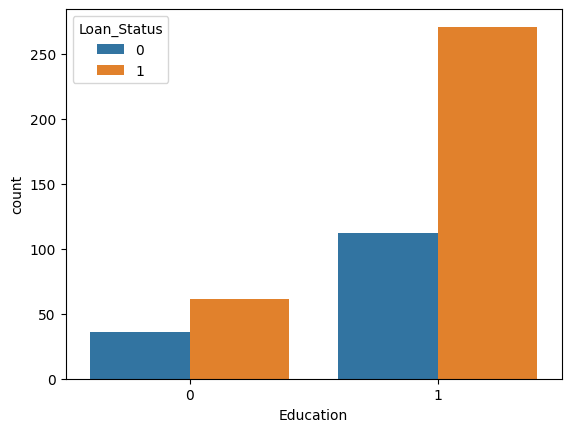

In [ ]:
#loan_status w education -> graduate 1, not graduated 0
sns.countplot(x='Education', hue='Loan_Status', data=loan)

<Axes: xlabel='Married', ylabel='count'>

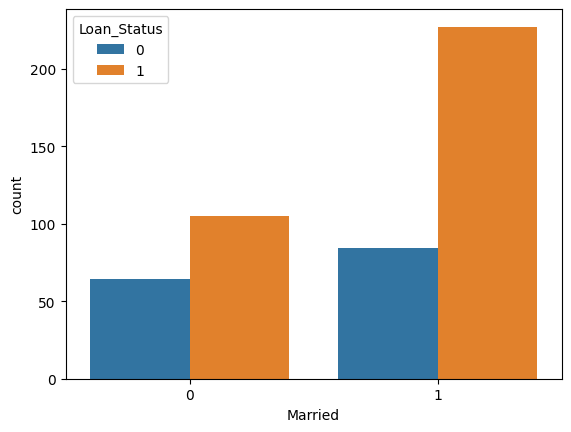

In [ ]:
#married w loan_status
sns.countplot(x='Married', hue='Loan_Status', data=loan)

<Axes: xlabel='Self_Employed', ylabel='count'>

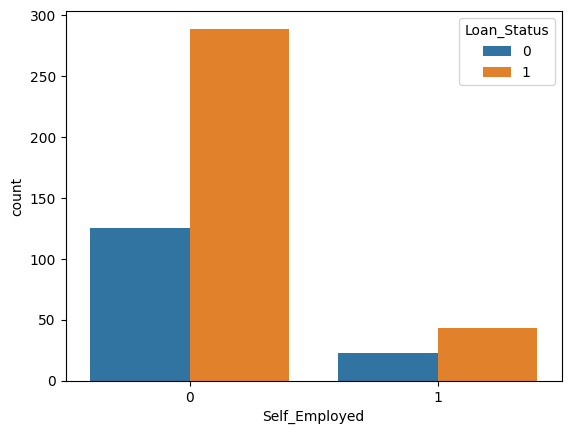

In [ ]:
#self employed w loan_status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan) #that means en el self employed mafeesh loan status

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
x = loan.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = loan['Loan_Status']

In [ ]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [81]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [84]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [85]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7760416666666666


In [86]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [87]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.75


In [91]:
input_data = (1,	1,1,	1,	0,	4583,	1508.0,	128.0,	360.0,	1.0,	2	)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if (prediction[0] == 0):
  print('Loan application likely to be rejected or denied.')
else:
  print(' Loan application likely to be approved or accepted')

 Loan application likely to be approved or accepted
